In [2]:
## Avani's notebook to play with loading, plotting, and fitting data.
## assuming that there is a data file somewhere with a gaussian in it 

In [98]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as sco
% matplotlib inline 

In [55]:
#Now make a function of a gaussian distribution
def gaussian(x,mean,sigma,A):
    
    #Set the normalisation
    norm = A/(sigma*np.sqrt(2.*np.pi))
    
    return norm*np.exp( -((x-mean)**2.) / (2.*sigma**2.) )

In [87]:
x = np.linspace(-10,10,1000)
y1 = gaussian(x,-5.0,0.5,0.03)

yn = y1 + np.random.normal(0,0.01,1000)

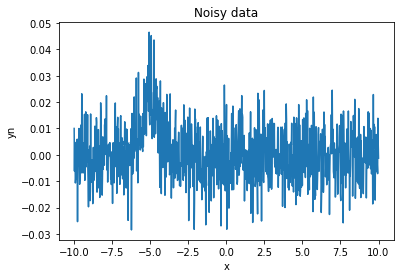

In [88]:
plt.plot(x,yn)
plt.xlabel('x')
plt.ylabel('yn')
plt.title('Noisy data')


In [90]:
f = open('workfile', 'w+')
data = np.array([x, yn])
data = data.T
np.savetxt(f, data, fmt=['%f','%f'])
f.close()

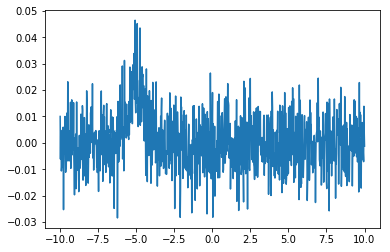

In [95]:
data_inp = np.loadtxt('workfile', dtype=float)
plt.plot(data_inp[:,0], data_inp[:,1])
xobs = data_inp[:,0]
yobs = data_inp[:,1]

(array([-0.04, -0.03, -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03,  0.04,
         0.05,  0.06]), <a list of 11 Text yticklabel objects>)

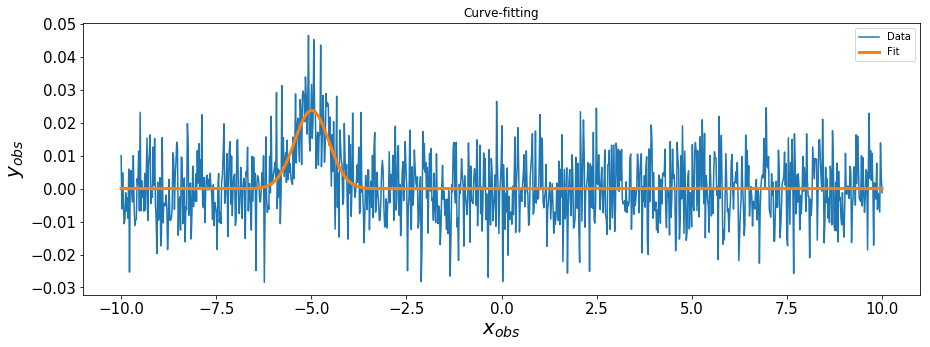

In [132]:
fit,cov = sco.curve_fit(gaussian, xobs,yobs, p0 = [50.,8,1e-2])
plt.figure(figsize=(15,5))
plt.plot(xobs, yobs, label='Data')
plt.plot(xobs, gaussian(xobs,*fit), label='Fit', linewidth=3)
plt.legend()
plt.xlabel('$x_{obs}$', size=20)
plt.ylabel('$y_{obs}$', size=20)
plt.title('Curve-fitting')
plt.xticks(size=15)
plt.yticks(size=15)

# Let's go to the next notebook!  [Intro_4.ipynb](Intro_4.ipynb)